### Naives Bayes Classification 
with features final_draw_position, final_televote_points, final_jury_points

#### Import Libraries

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

#### Load Data

In [5]:
df = pd.read_csv('Data/finalists_cleaned.csv')

#### Create Binary Target Variable

In [7]:
# Binary classification: 1 = Top 10, 0 = Not Top 10
df['top_10'] = df['final_place'].apply(lambda x: 1 if x <= 10 else 0)

#### Select Features and Target

In [9]:
features = [
    'final_draw_position',
    'final_televote_points', 'final_jury_points'
]
X = df[features]
y = df['top_10']

#### Handle Missing Values
should have been done in an earlier process 

In [11]:
print("Missing values BEFORE fillna:")
print(X.isnull().sum())

X = X.fillna(X.mean())  # Fill missing values

print("Missing values AFTER fillna:")
print(X.isnull().sum())

Missing values BEFORE fillna:
final_draw_position       0
final_televote_points    32
final_jury_points        32
dtype: int64
Missing values AFTER fillna:
final_draw_position      0
final_televote_points    0
final_jury_points        0
dtype: int64


#### Splitting For Test

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

#### Train Naive Bayes Model

In [15]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

#### Evaluate Model Performance

Accuracy: 0.9027777777777778
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        37
           1       0.94      0.86      0.90        35

    accuracy                           0.90        72
   macro avg       0.91      0.90      0.90        72
weighted avg       0.91      0.90      0.90        72



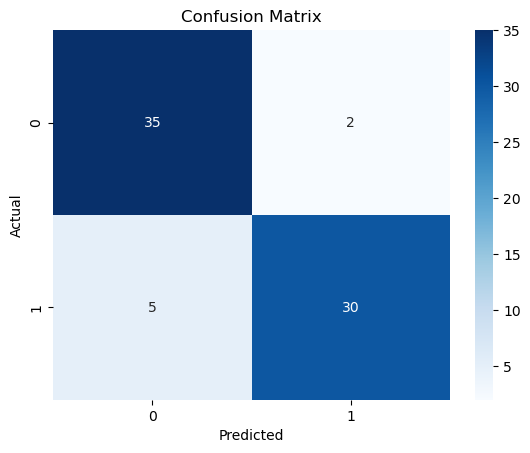

In [25]:
y_pred = model.predict(X_test)

# Accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('Images/NB_confusion_matrix.png')
plt.show()

#### Prediction on a New Sample

In [ ]:
sample = [[2, 20, 13]]  # draw, televote pts, jury pts
sample_df = pd.DataFrame(sample, columns=features)
prediction = model.predict(sample_df)
print("Top 10 prediction:", "Yes" if prediction[0] == 1 else "No")

#### Saving The Model

In [ ]:
import joblib

In [ ]:
# Store the model in a file
model_file = 'Models/bayes.pkl'

In [ ]:
joblib.dump(model, model_file)